In [5]:
import numpy as np
import cv2
from Crypto.Cipher import ChaCha20
from Crypto.Random import get_random_bytes

def chacha20_encrypt(data, key, iv=None, position=0):
    if not isinstance(data, bytes):
        raise TypeError('Data must be bytes.')
    if iv is None:
        iv = b'\0' * 8
    if isinstance(key, bytes):
        if not key:
            raise ValueError('Key is empty.')
        if len(key) < 32:
            key = (key * (32 // len(key) + 1))[:32]
        if len(key) > 32:
            raise ValueError('Key is too long.')
    
    # Initialize ChaCha20 cipher
    cipher = ChaCha20.new(key=key, nonce=iv)

    encrypted_data = b''
    # Encrypt data in blocks
    for i in range(0, len(data), 4096):
        block = data[i:i+4096]
        encrypted_data += cipher.encrypt(block)
    
    return encrypted_data

def encrypt_image(input_path, output_path, key):
    with open(input_path, 'rb') as image_file:
        image_data = image_file.read()

    iv = get_random_bytes(8)
    encrypted_data = chacha20_encrypt(image_data, key, iv)

    with open(output_path, 'wb') as encrypted_file:
        encrypted_file.write(iv + encrypted_data)

# Input the path of the image file
image_path = input("Enter the path of the image file: ")

# Choose the file name for encryption
encrypted_image_path = 'encrypted_image.png'
key = get_random_bytes(32)  # Generating a random 256-bit key

# Encrypt image
encrypt_image(image_path, encrypted_image_path, key)

# Load encrypted image
encrypted_image = cv2.imread(encrypted_image_path)

if encrypted_image is None:
    print("Error: Failed to load the encrypted image.")
else:
    # Reshape encrypted image into a mosaic form
    mosaic_size = 32  # Define the mosaic block size
    height, width, _ = encrypted_image.shape
    mosaic_height = height // mosaic_size
    mosaic_width = width // mosaic_size
    mosaic_image = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(mosaic_height):
        for j in range(mosaic_width):
            block = encrypted_image[i*mosaic_size:(i+1)*mosaic_size, j*mosaic_size:(j+1)*mosaic_size]
            mosaic_image[i*mosaic_size:(i+1)*mosaic_size, j*mosaic_size:(j+1)*mosaic_size] = block.mean(axis=(0, 1)).astype(np.uint8)

    # Save and display mosaic image
    mosaic_image_path = 'mosaic_encrypted_image.png'
    cv2.imwrite(mosaic_image_path, mosaic_image)
    print("Mosaic encrypted image saved as:", mosaic_image_path)


In [ ]:
import numpy as np
from Crypto.Cipher import ChaCha20
from Crypto.Random import get_random_bytes
import cv2

def chacha20_encrypt(data, key, iv=None, position=0):
    if not isinstance(data, bytes):
        raise TypeError('Data must be bytes.')
    if iv is None:
        iv = b'\0' * 8
    if isinstance(key, bytes):
        if not key:
            raise ValueError('Key is empty.')
        if len(key) < 32:
            key = (key * (32 // len(key) + 1))[:32]
        if len(key) > 32:
            raise ValueError('Key is too long.')
    
    # Initialize ChaCha20 cipher
    cipher = ChaCha20.new(key=key, nonce=iv)

    encrypted_data = b''
    # Encrypt data in blocks
    for i in range(0, len(data), 4096):
        block = data[i:i+4096]
        encrypted_data += cipher.encrypt(block)
    
    return encrypted_data

def encrypt_image(input_path, output_path, key):
    with open(input_path, 'rb') as image_file:
        image_data = image_file.read()

    iv = get_random_bytes(8)
    encrypted_data = chacha20_encrypt(image_data, key, iv)

    with open(output_path, 'wb') as encrypted_file:
        encrypted_file.write(iv + encrypted_data)

# Input the path of the image file
image_path = input("Enter the path of the image file: ")

# Choose the file name for encryption
encrypted_image_path = 'encrypted_image.png'
key = get_random_bytes(32)  # Generating a random 256-bit key

# Encrypt image
encrypt_image(image_path, encrypted_image_path, key)

# Load encrypted image
with open(encrypted_image_path, 'rb') as encrypted_file:
    encrypted_image_data = encrypted_file.read()

encrypted_image_array = np.frombuffer(encrypted_image_data, dtype=np.uint8)
encrypted_image = cv2.imdecode(encrypted_image_array, cv2.IMREAD_COLOR)

if encrypted_image is None:
    print("Error: Failed to load the encrypted image.")
else:
    # Reshape encrypted image into a mosaic form
    mosaic_size = 32  # Define the mosaic block size
    height, width, _ = encrypted_image.shape
    mosaic_height = height // mosaic_size
    mosaic_width = width // mosaic_size
    mosaic_image = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(mosaic_height):
        for j in range(mosaic_width):
            block = encrypted_image[i*mosaic_size:(i+1)*mosaic_size, j*mosaic_size:(j+1)*mosaic_size]
            mosaic_image[i*mosaic_size:(i+1)*mosaic_size, j*mosaic_size:(j+1)*mosaic_size] = block.mean(axis=(0, 1)).astype(np.uint8)

    # Save and display mosaic image
    mosaic_image_path = 'mosaic_encrypted_image.png'
    cv2.imwrite(mosaic_image_path, mosaic_image)
    print("Mosaic encrypted image saved as:", mosaic_image_path)


Error: Failed to load the encrypted image.


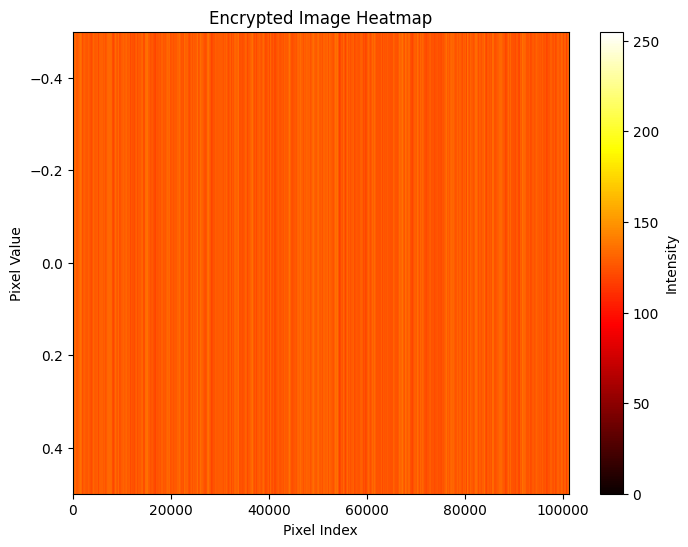

In [1]:
import numpy as np
from Crypto.Cipher import ChaCha20
from Crypto.Random import get_random_bytes
import matplotlib.pyplot as plt

def chacha20_encrypt(data, key, iv=None, position=0):
    if not isinstance(data, bytes):
        raise TypeError('Data must be bytes.')
    if iv is None:
        iv = b'\0' * 8
    if isinstance(key, bytes):
        if not key:
            raise ValueError('Key is empty.')
        if len(key) < 32:
            key = (key * (32 // len(key) + 1))[:32]
        if len(key) > 32:
            raise ValueError('Key is too long.')
    
    # Initialize ChaCha20 cipher
    cipher = ChaCha20.new(key=key, nonce=iv)

    encrypted_data = b''
    # Encrypt data in blocks
    for i in range(0, len(data), 4096):
        block = data[i:i+4096]
        encrypted_data += cipher.encrypt(block)
    
    return encrypted_data

def encrypt_image(input_path, output_path, key):
    with open(input_path, 'rb') as image_file:
        image_data = image_file.read()

    iv = get_random_bytes(8)
    encrypted_data = chacha20_encrypt(image_data, key, iv)

    with open(output_path, 'wb') as encrypted_file:
        encrypted_file.write(iv + encrypted_data)

# Input the path of the image file
image_path = input("Enter the path of the image file: ")

# Choose the file name for encryption
encrypted_image_path = 'encrypted_image.png'
key = get_random_bytes(32)  # Generating a random 256-bit key

# Encrypt image
encrypt_image(image_path, encrypted_image_path, key)

# Load encrypted image
with open(encrypted_image_path, 'rb') as encrypted_file:
    encrypted_image_data = encrypted_file.read()

encrypted_image_array = np.frombuffer(encrypted_image_data, dtype=np.uint8)

# Plot the encrypted image data as heatmap
plt.figure(figsize=(8, 6))
plt.imshow(encrypted_image_array.reshape(1, -1), cmap='hot', aspect='auto')
plt.title('Encrypted Image Heatmap')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.colorbar(label='Intensity')
plt.show()
